In [168]:
#This is the Importation Cell

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import gzip
import sys
import pickle
import time


f = gzip.open("C:\\Users\\ashle\\Classes\\IST597\\HW_2\\Data\\mnist.pkl.gz", 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(x_train, _), (x_test, _) = data

In [169]:
A = np.random.rand(6,4)

#A = np.identity(100)

#A = A + np.rot90(A) - .01*A_1

A = A - np.mean(A)

#A = A[:,:50]
print(A)


[[-0.16462174  0.1958969  -0.05479341  0.41574483]
 [-0.26296862 -0.47540732 -0.24191651  0.15303813]
 [ 0.30583305  0.42041029 -0.35673382  0.3301926 ]
 [ 0.12339136  0.36497237 -0.01353542 -0.36336647]
 [ 0.2872817   0.46766649 -0.22868055 -0.13003192]
 [-0.35722137  0.30118992 -0.46844417 -0.24789632]]


### Functions

In [170]:
#This is the Gram-Schmidt cell

def gram_schmidt(A_c):

    K = A_c.shape[1]
    
    E = np.zeros_like(A_c)
    U_p = np.zeros_like(E)
    R = np.zeros((K,K))

    
    for k in range(K):

        
        
        u = np.squeeze(A_c[:,k]).copy()
            

        for i in range(k):
            u -= np.dot(u,np.squeeze(U_p[:,i]))*np.squeeze(U_p[:,i])

        U_p[:,k] = u.copy()
        U_p[:,k] = U_p[:,k].copy()/np.linalg.norm(U_p[:,k])
        
    E = U_p
    for i in range(K):

        for j in range(i+1):

            R[j,i] = np.dot(np.squeeze(A_c[:,i]),np.squeeze(E[:,j]))
    
    
    return E , R

In [171]:
#This cell has the total svd stuff in it

def svd(A_c):
    A_c = A_c - np.mean(A_c)
    U , s , V = np.linalg.svd(A_c.copy())
    
    M = A_c.shape[0]
    N = A_c.shape[1]
    
    S = np.diag(s)
    z = np.zeros((1,N))
    
    for i in range(M-N):
        S = np.concatenate((S,z),axis = 0)

    return U , S , V

def sgn(a):
    return np.sign(a)



In [172]:
#This cell performs the streaming svd



def streamSVD(batchSize, noBatches,ff , k):

    A = np.reshape(x_train[:batchSize,:,:],(batchSize,28*28))
    A = A.T
    A = A - np.mean(A)

    Q , R = gram_schmidt(A.copy())

    U_p , D , V_t = svd(R)
    U = np.matmul(Q,U_p)

    U_save = np.zeros((784,3 , noBatches))

    for i in range(noBatches):
        
        A = np.reshape(x_train[batchSize*(i):batchSize*(i+1),:,:],(batchSize,28*28))
        A = A.T
        A = A - np.mean(A)

        U_p , D_p = gram_schmidt(np.concatenate((ff*np.matmul(U,D) , A),axis = 1))

        U_til , D_til , V_til_t = svd(D_p)

        U_til = U_til[:,:k]
        U = np.matmul(U_p,U_til)
        
        U_save[:,:,i] = U[:,:3].copy()
        D = D_til[:k,:k]
        #D[k:,k:] = 0

    return U , D , U_save
        



### Question 1

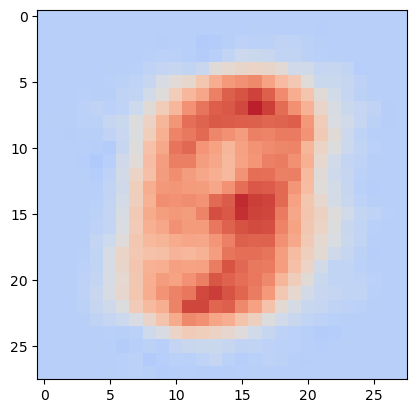

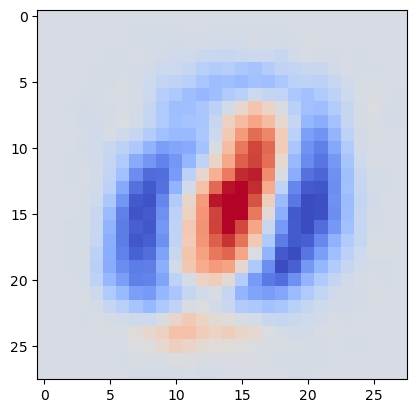

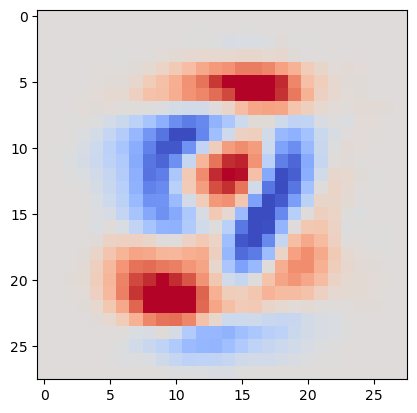

In [173]:
#This cell carries out the first homework question

U , D , _ = streamSVD(50,100,1 , 100) #As seen we call the streamSVD function with a batchsize of 50, a total batch number of 100
#a forget factor of 1, and we retain all vectors (100)

U = -U #A side-effect of my code is that U comes out negative

plt.imshow(np.reshape(U[:,0],(28,28)),cmap = "coolwarm", vmin = -.1 , vmax = .1) #Here and the following lines show the first three singular vectors

plt.show()

plt.imshow(np.reshape(U[:,1],(28,28)),cmap = "coolwarm", vmin = -.1 , vmax = .1)

plt.show()

plt.imshow(np.reshape(U[:,2],(28,28)),cmap = "coolwarm", vmin = -.1 , vmax = .1)

plt.show()

#As you can see I have implemented Levy and Lindenbaum's streaming SVD and deployed it on the MNIST dataset in batches of 50

### Question 2

##### Part 1

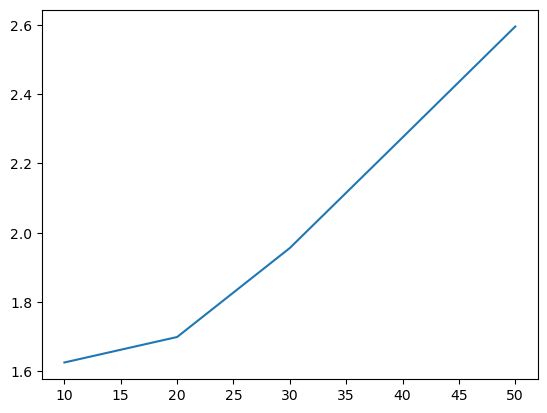

In [174]:
#This cell performs part 1 of Question 2

times = np.zeros((5,10))

for i in range(0,5):

    for j in range(0,10):
        
        t1 = time.time()
        _,_,_ = streamSVD(10*(i+1) , int(500 / (i+1)) , 1 , 10)
        t2 = time.time()

        dt = t2 - t1

        times[i,j] = dt

times = np.mean(times,1)

plt.plot(10*np.arange(1,6),times)

#As seen here, the higher the batch size, the higher the time.

##### Part 2

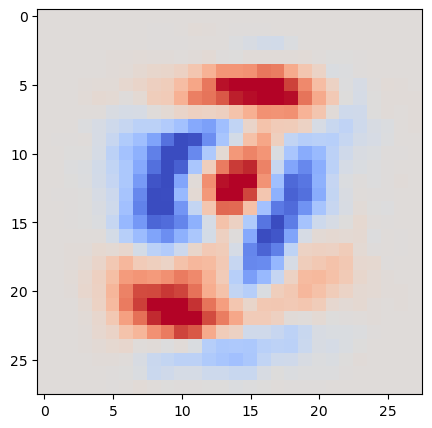

In [175]:
#This cell does part 2 of Question 2. This saves pngs which are later converted to a gif

_,_,U_save = streamSVD(50 , 100 , 1 , 10)

U_save = np.reshape(U_save , (28,28,3,100))
U_save = -U_save




FPS = 12
FRAMES = range(0,100) # iterator for animate function
FILENAME = 'basic_animation.mp4'

# Create fig and axes
fig, ax = plt.subplots(figsize=(5,5))

for i in range(100):
    U_save = -U_save
    ax.clear() # Clear ax (use if each frame is redrawn from scratch)
    im = plt.imshow(U_save[:,:,0,i] ,cmap = "coolwarm", vmin = -.1 , vmax = .1)
    plt.savefig("a" + f"{i :03}" + ".png")


for i in range(100):
    ax.clear() # Clear ax (use if each frame is redrawn from scratch)
    im = plt.imshow(U_save[:,:,1,i] * sgn(U_save[5,5,1,i]) ,cmap = "coolwarm", vmin = -.1 , vmax = .1)
    plt.savefig("a" + f"{i + 100:03}" + ".png")


for i in range(100):
    ax.clear() # Clear ax (use if each frame is redrawn from scratch)
    im = plt.imshow(U_save[:,:,2,i] * sgn(U_save[5,5,2,i]) ,cmap = "coolwarm", vmin = -.1 , vmax = .1)
    plt.savefig("a" + f"{i + 200:03}" + ".png")
    



##### Part 3

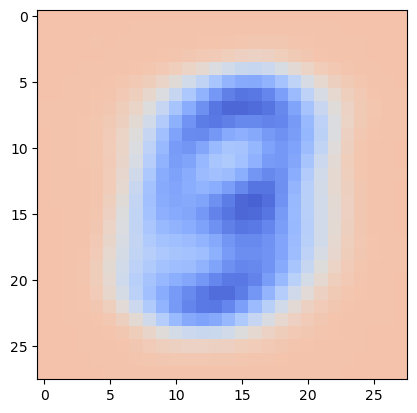

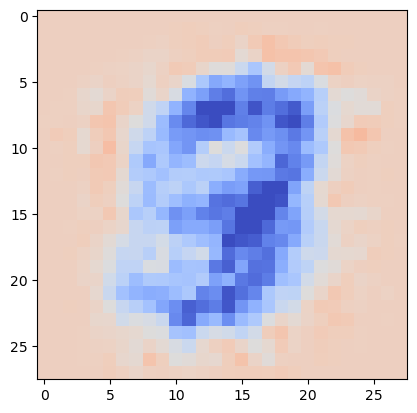

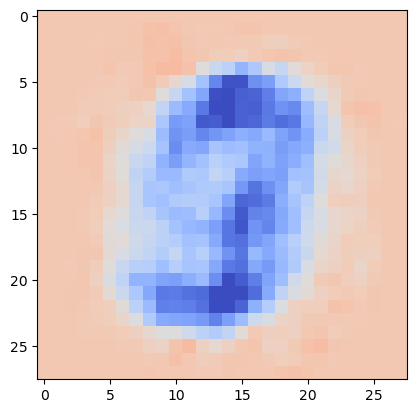

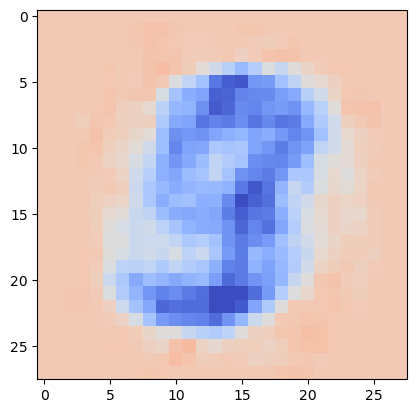

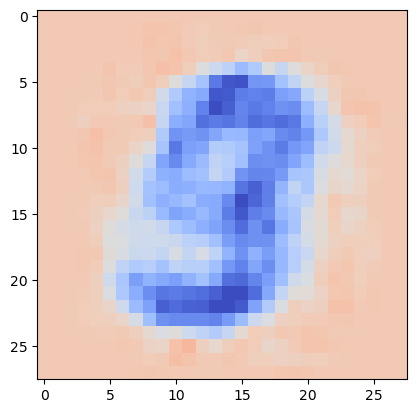

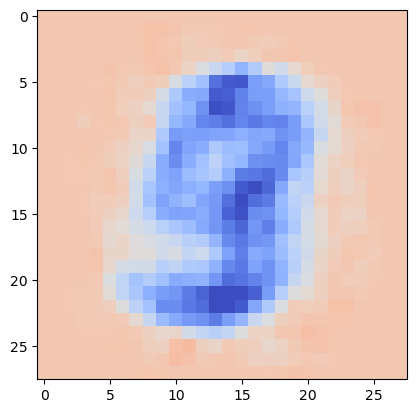

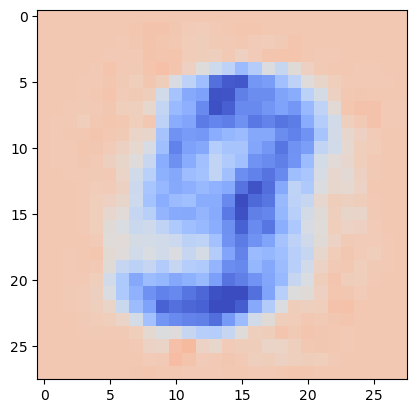

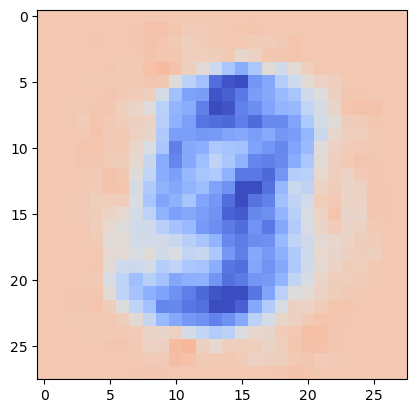

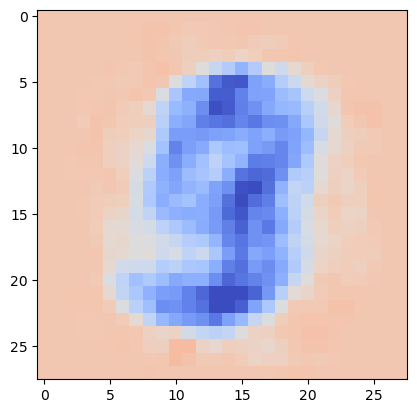

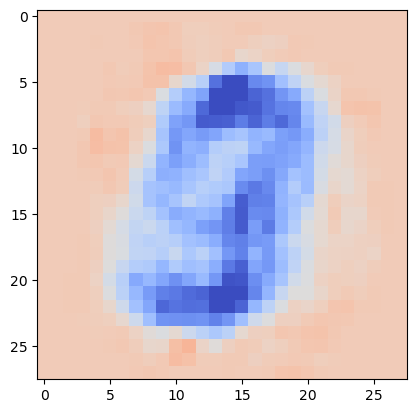

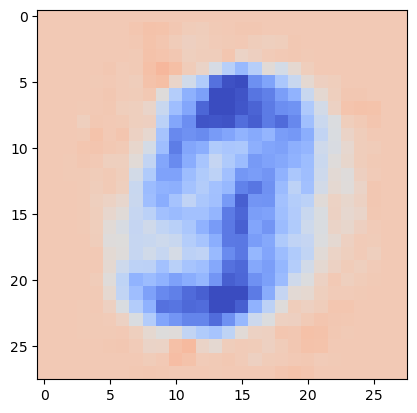

In [176]:
#This cell does part 3 of Question 2.

A = np.reshape(x_train[:5000,:,:],(5000,28*28))
A = A.T
A = A - np.mean(A)

U,S,V = svd(A)

plt.imshow(np.reshape(U[:,0],(28,28)) , cmap = "coolwarm" , vmin = -.1 , vmax = .1)
plt.show()

for j in range(0,10):
        
    U,_,_ = streamSVD(50 , 100 , 1/(j+1) , 10)
    U = U * sgn(U[0,0])
    plt.imshow(np.reshape(U[:,0],(28,28)),cmap = "coolwarm", vmin = -.1 , vmax = .1)

    plt.show()

#The following plots show the SVD and streaming SVD for 5000 images. The first image is the SVD of the whole 5000, while the following 10 are
#streamed with different forget factors. The forget factor is equal to 1/n, so the first one had an ff of 1, the second had .5, and so on.
#There doesn't seem to be too much of a difference as the forget factor changes, aside from less noise at higher forget factors.
#Compairing qualitatively between the SVD and streamed SVD results shows the streamed SVD results to be quite noisy as compaired
#to the standard SVD. This is most likely due to the low amount of vectors I retained (10) for the sake of speed.
#Otherwise, they are similar structurally.